In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train[0].shape

(28, 28)

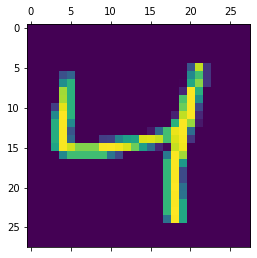

In [ ]:
plt.matshow(X_train[2]);

In [ ]:
X_train= X_train / 255
X_test = X_test / 255

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')

])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,Y_train, epochs=5 )

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2738 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0664 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9838


In [ ]:
(X_train[:5]);

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([2.0870566e-04, 7.7098608e-04, 5.7396740e-02, 9.7519940e-01,
       8.6883274e-06, 3.5196543e-03, 4.6914749e-07, 9.9983418e-01,
       1.5021592e-02, 7.5622547e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

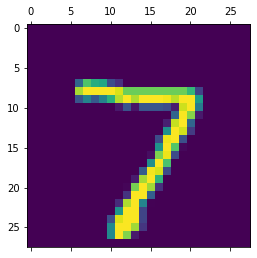

In [ ]:
plt.matshow(X_test[0]);

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Truth')

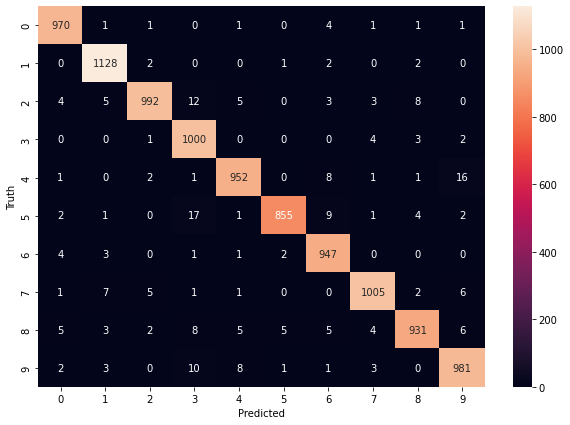

In [ ]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = y_predicted_labels)
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel ('Predicted')
plt.ylabel ('Truth')